# Preprocess

In [42]:
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame

In [43]:
labels = pd.read_csv('./label.csv', header=None, names=['paper_id', 'label'])
labels.head()

,paper_id,label
0,0,Neural_Networks
1,1,Rule_Learning
2,2,Reinforcement_Learning
3,3,Reinforcement_Learning
4,4,Probabilistic_Methods


In [44]:
# read attr.csv and adj_list.csv by hand
f = open('./attr.csv', 'r')
attr = f.read().splitlines()
attr_trans = []
for i in range(len(attr)):
    items = attr[i].split(',')
    paper_id = items[0]
    words = []
    for i in range(1, len(items)):
        words.append(items[i])
    attr_trans.append([paper_id, words])
attr_data = DataFrame(attr_trans, columns=['paper_id', 'word_ids'])
attr_data

,paper_id,word_ids
0,0,"[118, 125, 176, 252, 351, 456, 507, 521, 619, ..."
1,1,"[12, 509, 620, 763, 882, 893, 978, 1131, 1135,..."
2,2,"[45, 209, 212, 239, 292, 394, 510, 514, 581, 6..."
3,3,"[41, 93, 99, 149, 594, 617, 624, 648, 874, 915..."
4,4,"[44, 122, 135, 153, 364, 396, 402, 474, 507, 6..."
...,...,...
2703,2703,"[118, 263, 299, 310, 379, 534, 597, 675, 812, ..."
2704,2704,"[346, 403, 459, 469, 495, 701, 723, 763, 766, ..."
2705,2705,"[130, 192, 205, 277, 310, 332, 495, 539, 560, ..."
2706,2706,"[4, 48, 54, 132, 287, 475, 609, 933, 1131, 113..."


In [45]:
f = open('./adj_list.csv', 'r')
adj = f.read().splitlines()
adj_trans = []
for i in range(len(adj)):
    items = adj[i].split(',')
    paper_id = items[0]
    neighbors = []
    for i in range(1, len(items)):
        neighbors.append(items[i])
    adj_trans.append([paper_id, neighbors])
DataFrame(adj_trans, columns=['paper_id', 'neigbor_ids'])

,paper_id,neigbor_ids
0,0,"[8, 14, 258, 435, 544]"
1,1,[344]
2,2,"[410, 471, 552, 565]"
3,3,"[197, 463, 601]"
4,4,[170]
...,...,...
2703,2703,"[1221, 1409, 2200]"
2704,2704,"[209, 2407]"
2705,2705,"[1784, 1839, 1840, 2216]"
2706,2706,"[1046, 1138, 1640, 1752]"


In [46]:
labels.dropna(inplace=True)
attr_data.dropna(inplace=True)

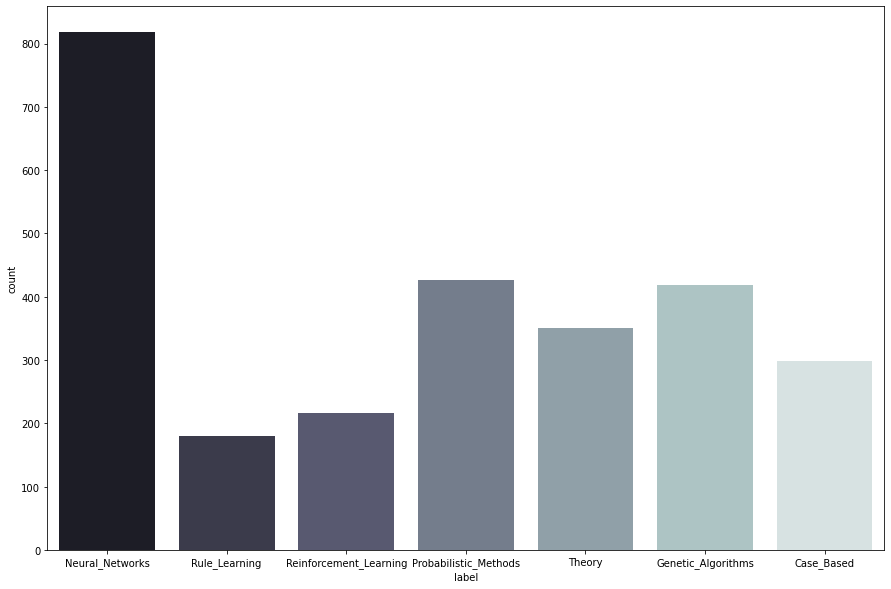

total_lael has:  7  labels


In [47]:
# label distribution
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(x="label", data=labels, palette="bone")
plt.show()
# print("train_lael has: ",len(train_label['label'].unique())," labels")
# print("test_lael has: ",len(test_label['label'].unique())," labels")
# total_label = pd.concat([train_label,test_label], axis=0)
print("total_lael has: ",len(labels['label'].unique())," labels")

In [48]:
# Construct word vector for attr data
word_ids = set()
for i in range(len(attr_data)):
    for index in attr_data['word_ids'][i]:
        word_ids.add(int(index))
    if len(np.unique(attr_data['word_ids'][i])) != len(attr_data['word_ids'][i]):
        print('duplicate words in paper ', i)
word_ids = list(word_ids)
print(word_ids.sort() == [ i for i in range(0, len(word_ids))])

False


In [49]:
word_ids[444]

445

In [50]:
len(word_ids)

1432

In [51]:
# word id 444 is missing for all paper
vector_len = 1433
paper_word2vector = []
for i in range(len(attr_data)):
    vector = [ 0 for _ in range(vector_len)]
    for index in attr_data['word_ids'][i]:
        vector[int(index)] = 1
    paper_word2vector.append([i, vector])
len(paper_word2vector)

2708

In [52]:
# construct word vectors
word_vector = DataFrame(paper_word2vector, columns=['paper_id', 'word_vector'])
word_vector

,paper_id,word_vector
0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."
2,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
2703,2703,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2704,2704,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2705,2705,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2706,2706,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [53]:
# merge word vectors with labels
data = pd.merge(word_vector, labels)
data.drop(axis=1, columns='paper_id', inplace=True)
unique_labels = data['label'].unique().tolist()
one_hot_labels = []
for i in range(len(data)):
    one_hot_label = [ 0 for _ in range(len(unique_labels))]
    one_hot_label[unique_labels.index(data['label'][i])] = 1
    one_hot_labels.append([i, one_hot_label])
one_hot_col = DataFrame(one_hot_labels, columns=['id', 'one_hot_label'])
data = pd.concat([data, one_hot_col], axis=1)
data.drop(axis=1, columns=['label', 'id'], inplace=True)

In [54]:
data

,word_vector,one_hot_label
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0]"
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0]"
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0]"
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0]"
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0]"
...,...,...
2703,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 0]"
2704,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 0]"
2705,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 0]"
2706,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 1]"


In [55]:
train_data = data.sample(frac=0.8)
test_data = data[~data.index.isin(train_data.index)]
train_data

,word_vector,one_hot_label
1194,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 1]"
664,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0]"
1670,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 0]"
2571,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0]"
33,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0]"
...,...,...
97,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0]"
2607,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 1]"
1071,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0]"
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0]"


In [56]:
test_data

,word_vector,one_hot_label
6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0]"
14,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0]"
17,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0]"
29,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0]"
31,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0]"
...,...,...
2694,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0]"
2695,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0]"
2698,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0]"
2699,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0]"


In [57]:
X_train, y_train, X_test, y_test = np.array(train_data['word_vector']), np.array(train_data['one_hot_label']), np.array(test_data['word_vector']), np.array(test_data['one_hot_label'])

In [58]:
y_train = [np.array(x) for x in y_train]
# y_train = np.argmax(y_train,axis=1)
y_test = [np.array(x) for x in y_test]
# y_test = np.argsort(y_test,axis=1)

In [59]:
X_train = [np.array(x) for x in X_train]
X_test = [np.array(x) for x in X_test]

In [60]:
len(y_train)

2166

In [61]:
len(X_train)

2166

In [62]:
len(X_test)

542

In [63]:
len(y_test)

542

In [64]:
y_test_lr = []
y_train_lr = []
for i in range(len(y_test)):
    y_test_lr.append(y_test[i].tolist().index(1))
for i in range(len(y_train)):
    y_train_lr.append(y_train[i].tolist().index(1))
y_train_lr, y_test_lr = np.array(y_train_lr), np.array(y_test_lr)
y_train_ori = [np.array(x) for x in y_train_lr]
y_test_ori = [np.array(x) for x in y_test_lr]

# Classification(without one-hot encoding)

## MLP

In [65]:
from sklearn.neural_network import MLPClassifier

clf_mlp = MLPClassifier(solver='sgd', alpha=1e-5,
                    hidden_layer_sizes=(1000, 500, 100, 10), random_state=1,max_iter=1000)
clf_mlp.fit(X_train, y_train_ori)
train_score = clf_mlp.score(X_train, y_train_ori)
test_score = clf_mlp.score(X_test, y_test_ori)

compare_model_ori = pd.DataFrame(data=[["Neural Network", train_score, test_score]],columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
# compare_models = compare_models.append(compare_model_3,ignore_index=True)
compare_model_ori

,Model,Training Accuracy %,Testing Accuracy %
0,Neural Network,1.0,0.714022


## Decision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train_ori)
train_score = clf_dt.score(X_train, y_train_ori)
test_score = clf_dt.score(X_test, y_test_ori)

compare_model = pd.DataFrame(data=[["Decision Tree", train_score, test_score]],columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
compare_model_ori = pd.concat([compare_model_ori, compare_model], ignore_index=True)
compare_model_ori

,Model,Training Accuracy %,Testing Accuracy %
0,Neural Network,1.0,0.714022
1,Decision Tree,1.0,0.638376


## Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train_ori)

train_score = clf_lr.score(X_train, y_train_ori)
test_score = clf_lr.score(X_test, y_test_ori)
compare_model = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]],columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
compare_model_ori = pd.concat([compare_model_ori, compare_model], ignore_index=True)
compare_model_ori

,Model,Training Accuracy %,Testing Accuracy %
0,Neural Network,1.000000,0.714022
1,Decision Tree,1.000000,0.638376
2,Logistic Regression,0.988458,0.747232


## KNN model

In [68]:
# from sklearn.metrics import accuracy_score,roc_curve,auc
# from sklearn.model_selection import cross_val_score,ShuffleSplit,cross_validate
# train_label = train_label.values.ravel()

In [69]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
test_results = []
for n in range(1, 15):
    clf_knn = KNeighborsClassifier(n_neighbors=n)
    clf_knn.fit(X_train, y_train_ori)
    train_score = clf_knn.score(X_train, y_train_ori)
    test_score = clf_knn.score(X_test, y_test_ori)
    test_results.append(test_score)
#     print(n,":",train_score, test_score)
aim_n = test_results.index(max(test_results)) + 1
clf_knn = KNeighborsClassifier(n_neighbors=aim_n)
clf_knn.fit(X_train, y_train_ori)
train_score = clf_knn.score(X_train, y_train_ori)
test_score = clf_knn.score(X_test, y_test_ori)
compare_model = pd.DataFrame(data=[["KNN", train_score, test_score]],columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
compare_model_ori = pd.concat([compare_model_ori, compare_model], ignore_index=True)
compare_model_ori
# cv = ShuffleSplit(n_splits=10, test_size=0.4, random_state=0)
# scores = cross_validate(clf_knn,data_aft_stdsscsl,train_label,cv=cv,return_train_score=True)
# print("Train accuracy of KNN: {:.2f}%".format(scores['train_score'].mean()*100))
# print("Test accuracy of KNN: {:.2f}%".format(scores['test_score'].mean()*100))
# compare_models = pd.DataFrame(data=[["KNN", scores['train_score'].mean()*100, scores['test_score'].mean()*100]],columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
# compare_models

,Model,Training Accuracy %,Testing Accuracy %
0,Neural Network,1.000000,0.714022
1,Decision Tree,1.000000,0.638376
2,Logistic Regression,0.988458,0.747232
3,KNN,0.626962,0.509225


## Ensemble

In [70]:
from sklearn.ensemble import VotingClassifier

test_results = []
weights = []
for i in range(1, 9):
    for j in range(1, 9 - i):
        k = 10 - i - j
        clf_ensembel = VotingClassifier(estimators=[('knn',clf_knn), ('decision tree',clf_dt),('neural network',clf_mlp)],voting='hard',weights=[i, j, k])
        clf_ensembel.fit(X_train, y_train_ori)
        train_score = clf_ensembel.score(X_train, y_train_ori)
        test_score = clf_ensembel.score(X_test, y_test_ori)
        test_results.append(test_score)
        weights.append([i, j, k])
        print(i, j, k, ":", train_score, test_score)

# clf_ensembel = VotingClassifier(estimators=[('knn',clf_knn), ('decision tree',clf_dt),('neural network',clf_mlp)],voting='hard',weights=[1,3,2])

# clf_ensembel.fit(X_train, y_train_ori)

# train_score = clf_ensembel.score(X_train, y_train_ori)
# test_score = clf_ensembel.score(X_test, y_test_ori)
# train_score, test_score
# compare_model = pd.DataFrame(data=[["Ensembel", train_score, test_score]],columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
# compare_models = pd.concat([compare_models, compare_model], ignore_index=True)
# compare_models

1 1 8 : 1.0 0.7140221402214022
1 2 7 : 1.0 0.7140221402214022
1 3 6 : 1.0 0.7140221402214022
1 4 5 : 1.0 0.7084870848708487
1 5 4 : 1.0 0.6715867158671587
1 6 3 : 1.0 0.6107011070110702
1 7 2 : 1.0 0.6328413284132841
2 1 7 : 1.0 0.7140221402214022
2 2 6 : 1.0 0.7140221402214022
2 3 5 : 1.0 0.7047970479704797
2 4 4 : 1.0 0.6900369003690037
2 5 3 : 1.0 0.6697416974169742
2 6 2 : 1.0 0.6383763837638377
3 1 6 : 1.0 0.7140221402214022
3 2 5 : 1.0 0.7066420664206642
3 3 4 : 1.0 0.7066420664206642
3 4 3 : 1.0 0.6789667896678967
3 5 2 : 1.0 0.6642066420664207
4 1 5 : 1.0 0.7029520295202952
4 2 4 : 1.0 0.6863468634686347
4 3 3 : 1.0 0.6586715867158671
4 4 2 : 1.0 0.6715867158671587
5 1 4 : 0.7691597414589104 0.5682656826568265
5 2 3 : 0.7691597414589104 0.5682656826568265
5 3 2 : 0.7691597414589104 0.5701107011070111
6 1 3 : 0.6269621421975993 0.5092250922509225
6 2 2 : 0.6269621421975993 0.5092250922509225
7 1 2 : 0.6269621421975993 0.5092250922509225


In [71]:
from random import choice

chosen_weights = []
for i in range(len(test_results)):
    if test_results[i] == max(test_results):
        chosen_weights.append(weights[i])

clf_ensembel = VotingClassifier(estimators=[('knn',clf_knn), ('decision tree',clf_dt),('neural network',clf_mlp)],voting='hard',weights=choice(chosen_weights))
clf_ensembel.fit(X_train, y_train_ori)
train_score = clf_ensembel.score(X_train, y_train_ori)
test_score = clf_ensembel.score(X_test, y_test_ori)
compare_model = pd.DataFrame(data=[["Ensemble", train_score, test_score]],columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
compare_model_ori = pd.concat([compare_model_ori, compare_model], ignore_index=True)
compare_model_ori

,Model,Training Accuracy %,Testing Accuracy %
0,Neural Network,1.000000,0.714022
1,Decision Tree,1.000000,0.638376
2,Logistic Regression,0.988458,0.747232
3,KNN,0.626962,0.509225
4,Ensemble,1.000000,0.714022


In [72]:
compare_model_ori.to_csv('./compare_model_ori.csv')

# Classification(with one-hot encoding)

## MLP

In [73]:
from sklearn.neural_network import MLPClassifier

clf_mlp = MLPClassifier(solver='sgd', alpha=1e-5,
                    hidden_layer_sizes=(1000, 500, 100, 10), random_state=1,max_iter=1000)
clf_mlp.fit(X_train, y_train)
train_score = clf_mlp.score(X_train, y_train)
test_score = clf_mlp.score(X_test, y_test)

compare_models_one_hot = pd.DataFrame(data=[["Neural Network", train_score, test_score]],columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
# compare_models = compare_models.append(compare_model_3,ignore_index=True)
compare_models_one_hot

,Model,Training Accuracy %,Testing Accuracy %
0,Neural Network,0.999077,0.614391


## Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
train_score = clf_dt.score(X_train, y_train)
test_score = clf_dt.score(X_test, y_test)

compare_model = pd.DataFrame(data=[["Decision Tree", train_score, test_score]],columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
compare_models_one_hot = pd.concat([compare_models_one_hot, compare_model], ignore_index=True)
compare_models_one_hot

,Model,Training Accuracy %,Testing Accuracy %
0,Neural Network,0.999077,0.614391
1,Decision Tree,1.000000,0.638376


## KNN model

In [75]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
test_results = []
for n in range(1, 15):
    clf_knn = KNeighborsClassifier(n_neighbors=n)
    clf_knn.fit(X_train, y_train)
    train_score = clf_knn.score(X_train, y_train)
    test_score = clf_knn.score(X_test, y_test)
    test_results.append(test_score)
#     print(n,":",train_score, test_score)
aim_n = test_results.index(max(test_results)) + 1
clf_knn = KNeighborsClassifier(n_neighbors=aim_n)
clf_knn.fit(X_train, y_train)
train_score = clf_knn.score(X_train, y_train)
test_score = clf_knn.score(X_test, y_test)
compare_model = pd.DataFrame(data=[["KNN", train_score, test_score]],columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
compare_models_one_hot = pd.concat([compare_models_one_hot, compare_model], ignore_index=True)
compare_models_one_hot

,Model,Training Accuracy %,Testing Accuracy %
0,Neural Network,0.999077,0.614391
1,Decision Tree,1.000000,0.638376
2,KNN,1.000000,0.453875


In [76]:
compare_models_one_hot.to_csv('./compare_models_one_hot.csv')

In [77]:
test = pd.read_csv('./compare_models_one_hot.csv')
test

,Unnamed: 0,Model,Training Accuracy %,Testing Accuracy %
0,0,Neural Network,0.999077,0.614391
1,1,Decision Tree,1.000000,0.638376
2,2,KNN,1.000000,0.453875
